In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley1 import ShapNN
from DSap1 import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

d:\DataShapley\DSap1.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


In [5]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 807.1 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.0 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.0 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.0 MB 765.3 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 655.5 kB/s et

In [1]:
pip install tensorflow



     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 761.1 kB/s eta 0:08:15
   ---------------------------------------- 0.2/377.0 MB 761.1 kB/s eta 0:08:15
   ------------------

Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [2]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [3]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.70


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [4]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

LOO values calculated!




ValueError: Tried to convert 'tensor' to a tensor and failed. Error: None values not supported.

In [ ]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=2)
dshap.run(100, 0.1)

Now we merge results for the parallel runs:

In [65]:
dshap.merge_results()

./temp/mem_tmc_0000.pkl
./temp/mem_g_0000.pkl


Let's look at the convergence plots of the algorithms.

In [ ]:
convergence_plots(dshap.marginals_tmc)

In [ ]:
convergence_plots(dshap.marginals_g)

Now let's see the effect of removing high valuen points

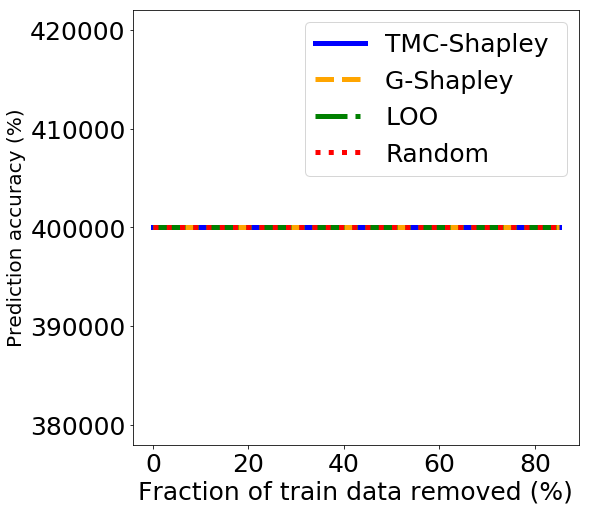

In [68]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

In [1]:
!python tensor.py

2024-06-27 09:09:27.510884: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 09:09:29.643757: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 09:09:34.813176: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Traceback (most recent call last):
  File "d:\DataShapley\tensor.py", line 10, i